In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error as mse

### Draw a period of the given sinusoidal function

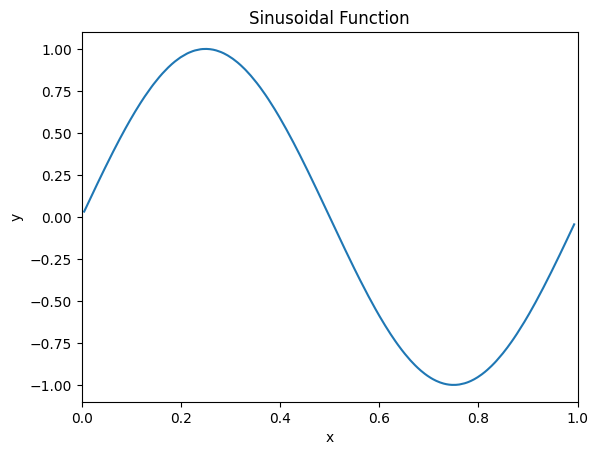

In [2]:
# Define initial N
N = 500

def generate_samples(N):
    np.random.seed(42)
    # Generate N samples uniformly distributed in [0, 1]
    x = np.sort(np.random.uniform(0, 1, N))   
    # Compute y values for sin(2*pi*x)
    y = np.sin(2*np.pi*x)   

    return x, y

x, y = generate_samples(N)

plt.plot(x, y)
plt.xlim([0, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sinusoidal Function')
plt.show()

### Add Gaussian noise to every y(x)

In [3]:
# Define function that adds gaussian noise to y
def add_noise(N, y):
    np.random.seed(42)
    noise = np.random.normal(0,1,N)
    
    return y+noise

### Fit polynomial models 

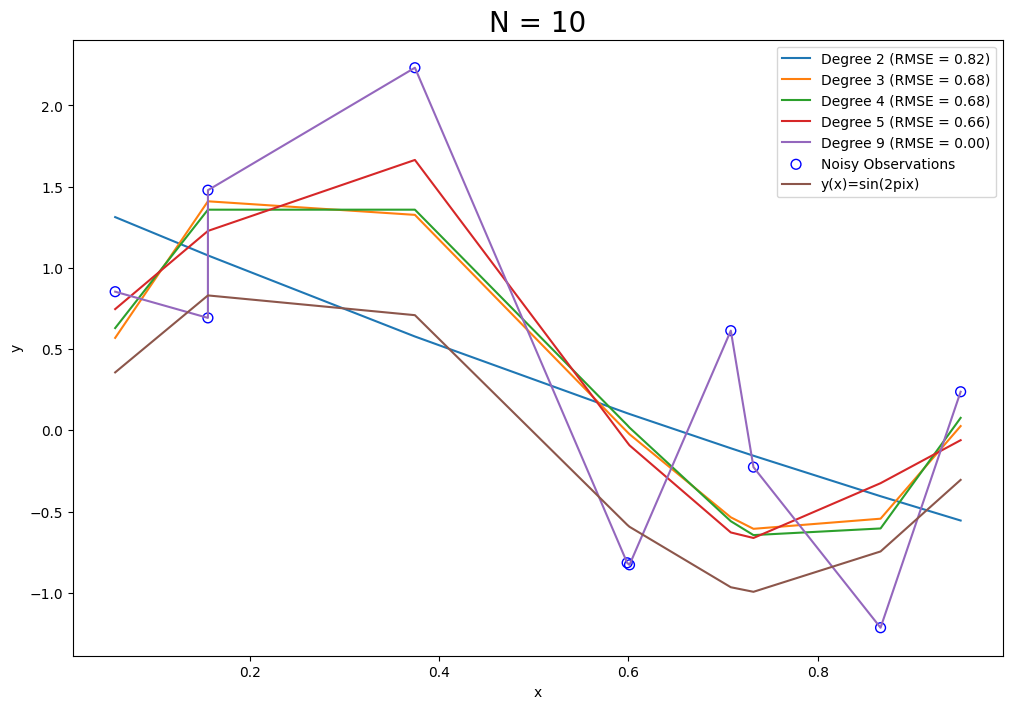

,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,Degree_6,Degree_7,Degree_8,Degree_9,RMSE
M,,,,,,,,,,
2,-2.49,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82
3,17.25,-45.46,29.10,NaN,NaN,NaN,NaN,NaN,NaN,0.68
4,13.44,-29.01,3.83,1.258000e+01,NaN,NaN,NaN,NaN,NaN,0.68
5,-9.67,124.38,-397.28,4.612700e+02,-1.798600e+02,NaN,NaN,NaN,NaN,0.66
9,-783640.61,9545431.79,-57840512.06,2.019541e+08,-4.341369e+08,5.854456e+08,-4.835140e+08,2.238263e+08,-44520785.56,0.00


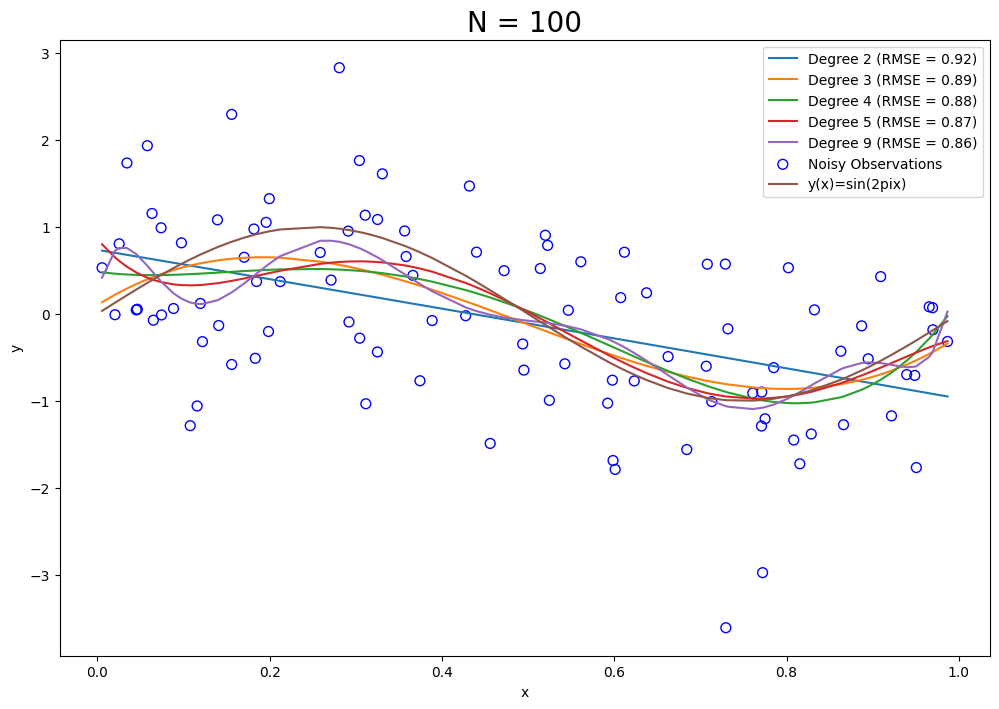

,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,Degree_6,Degree_7,Degree_8,Degree_9,RMSE
M,,,,,,,,,,
2,-1.68,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92
3,6.24,-20.13,13.54,NaN,NaN,NaN,NaN,NaN,NaN,0.89
4,-1.40,14.65,-41.07,27.49,NaN,NaN,NaN,NaN,NaN,0.88
5,-12.23,90.96,-246.96,261.81,-94.72,NaN,NaN,NaN,NaN,0.87
9,46.60,-1241.08,12467.36,-62459.09,176264.12,-293814.47,286991.58,-151854.4,33599.9,0.86


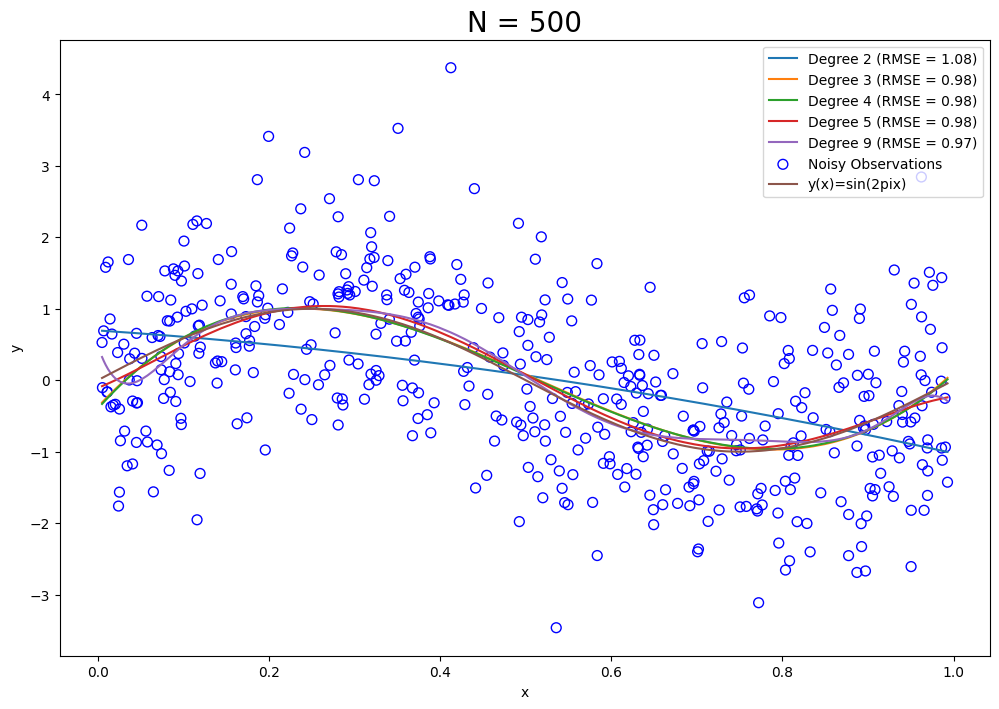

,Degree_1,Degree_2,Degree_3,Degree_4,Degree_5,Degree_6,Degree_7,Degree_8,Degree_9,RMSE
M,,,,,,,,,,
2,-0.79,-0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.08
3,13.01,-35.85,23.32,NaN,NaN,NaN,NaN,NaN,NaN,0.98
4,13.48,-37.98,26.66,-1.68,NaN,NaN,NaN,NaN,NaN,0.98
5,4.82,22.59,-134.94,180.39,-72.97,NaN,NaN,NaN,NaN,0.98
9,-36.82,822.11,-6998.86,31885.15,-85651.35,138904.13,-133319.37,69648.14,-15254.01,0.97


In [4]:
M = [2,3,4,5,9]

for n in [10, 100, N]:
    
    x, y = generate_samples(n)
    y_noise = add_noise(n, y)
    
    coef = []
    RMSE = []

    # Create a plot with all the models
    plt.figure(figsize=(12, 8))

    for m in M:

        poly = PolynomialFeatures(degree=m, include_bias=False)
        X_poly = poly.fit_transform(x.reshape(-1,1))

        # fit polynomical regression model
        model = LinearRegression()
        model.fit(X_poly, y_noise)

        y_pred = model.predict(X_poly)
        rmse = np.sqrt(mse(y_noise, y_pred))
        RMSE.append(np.sqrt(mse(y_noise, y_pred)))

        coef.append(model.coef_)
        # Plot the model
        plt.plot(x, y_pred, label=f'Degree {m} (RMSE = {rmse:.2f})')

    plt.scatter(x, y_noise, s=50, facecolors='none', edgecolors='b', label='Noisy Observations')
    plt.plot(x, y, label='y(x)=sin(2pix)')
    plt.legend(loc='upper right')
    plt.title(f'N = {n}', fontsize=20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    col_names = [f'Degree_{i}' for i in range(1,10)]
    coef = pd.DataFrame(columns=col_names, data=coef)
    coef['RMSE'] = RMSE
    coef['M'] = [2,3,4,5,9]
    coef.set_index('M', inplace=True)
    coef.fillna(0)
    display(coef.round(2))
    print()

__Conclusions:__

We can see that for N=10, the 9 degree polynomial overfits the data, having a `RMSE=0`.
The bigger the polynomial degree the harder was the ov erfit to the data. Overfitting occurs when a model fits the noise in the data instead of the underlying pattern

As the number of samples `N` gets bigger, the overfitting disappears and the RMSE of every best least-squares fit models (for every degree polynomial) converges to the value `1`. The more data samples we add, the more the models fit to underlying pattern, i.e. the initial sinusoidal function y=sin(2πx). 

We also observe that the coefficients of the 9th degree polynomial have huge values, which is a sign of overfit.  Large coefficients mean that the polynomial function is very complex and has many terms, which can lead to overfitting.